In [1]:
import json
import csv

import numpy as np
import pandas as pd

import seaborn as sns
print(sns.__version__)

from utils import *
%load_ext autoreload
%autoreload 2

%matplotlib inline

import unidecode
from utils import *
from tqdm import tqdm

0.7.1


## Convert tweet json files to csv

In [5]:
tweet_folder = '/media/storage/RawTweets/'
outpath = 'data/tweets_nov16_2017.csv'

#tweet_folder_json_to_csv(tweet_folder, outpath)

## Group tweets by region & filter for keywords

In [6]:
tweets_df = pd.read_csv(outpath)
regions_df = tweets_df.groupby('placename').apply(filter_tweets)
regions_df.head()

,latitude,longitude,num_tweets,physical_activity,sedentary_behavior,sleeping
placename,,,,,,
#FNLROM at Royal Ontario Museum,NaN,NaN,1.0,0.0,0.0,0.0
#Sadness,NaN,NaN,1.0,0.0,0.0,1.0
10 Dundas East,NaN,NaN,1.0,0.0,0.0,0.0
100 Bay Street South,NaN,NaN,1.0,0.0,0.0,0.0
1010 Bistro,NaN,NaN,1.0,0.0,0.0,0.0


In [38]:
regions_df.sort_values('num_tweets', ascending=False).head()

,latitude,longitude,num_tweets,physical_activity,sedentary_behavior,sleeping
placename,,,,,,
"Toronto, Ontario",43.686407,-79.383097,44754.0,354.0,1728.0,225.0
"Montréal, Québec",45.507884,-73.583789,11475.0,81.0,454.0,49.0
"Ottawa, Ontario",45.371499,-75.361060,11102.0,107.0,501.0,68.0
"Calgary, Alberta",51.039647,-114.076618,10643.0,102.0,469.0,49.0
"Vancouver, British Columbia",49.267705,-123.106493,10569.0,92.0,480.0,38.0


num_tweets            215722.0
physical_activity       2056.0
sedentary_behavior      9506.0
sleeping                1083.0
dtype: float64


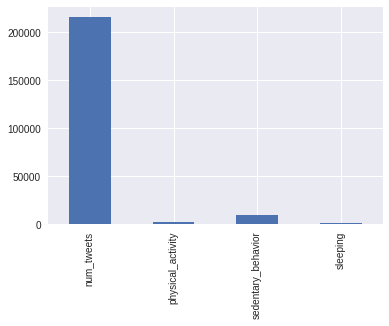

In [26]:
print(regions_df.loc[:, 'num_tweets':].sum())
regions_df.loc[:, 'num_tweets':].sum().plot(kind='bar')

## Compute geolocation for missing regions

In [15]:
regions_df = regions_df.sort_values('num_tweets', ascending=False)
compute_geolocation_regions_geocoder(regions_df)

223it [00:08, 26.37it/s]

Couldnt locate Alberta, Canada


227it [00:10, 22.69it/s]

Couldnt locate Arran-Elderslie, Ontario


266it [00:13, 19.79it/s]

Couldnt locate Asbestos, Québec


280it [00:15, 17.96it/s]

Couldnt locate Ismaili Centre, Toronto


295it [00:17, 16.51it/s]

Couldnt locate Wikwemikong Unceded, Ontario


348it [00:26, 13.22it/s]

Couldnt locate Berwick, Nova Scotia
Couldnt locate Division No.  2, Subd. C, Newfoundland and Labrador


366it [00:29, 12.42it/s]

Couldnt locate Annapolis, Subd. A, Nova Scotia


377it [00:32, 11.44it/s]

Couldnt locate Toronto Pearson International Airport (YYZ)


397it [00:36, 10.99it/s]

Couldnt locate Labrador City, Newfoundland and Labrador


412it [00:37, 10.91it/s]

Couldnt locate Colchester, Subd. B, Nova Scotia
Couldnt locate Bay Street Corridor, Toronto


424it [00:37, 11.19it/s]

Couldnt locate Sainte-Rose-de-Watford, Québec


430it [00:38, 11.17it/s]

Couldnt locate Nova Scotia, Canada


451it [00:41, 10.97it/s]

Couldnt locate Logy Bay-Middle Cove-Outer Cove, Newfoundland and Labrador


469it [00:43, 10.76it/s]

Couldnt locate Shelburne, Ontario


475it [00:45, 10.53it/s]

Couldnt locate Ponoka, Alberta


481it [00:46, 10.32it/s]

Couldnt locate Vancouver GVA


498it [00:55,  8.92it/s]

Couldnt locate Coaticook, Québec


510it [00:58,  8.76it/s]

Couldnt locate Mercier, Québec


516it [00:59,  8.73it/s]

Couldnt locate Cornwall, Prince Edward Island
Couldnt locate MaRS Discovery District


524it [00:59,  8.73it/s]

Couldnt locate Argyle, Nova Scotia


544it [01:06,  8.24it/s]

Couldnt locate Huron East, Ontario


545it [01:06,  8.19it/s]

Couldnt locate Church-Yonge Corridor, Toronto


571it [01:17,  7.41it/s]

Couldnt locate Lacombe County, Alberta


596it [01:22,  7.20it/s]

Couldnt locate Guysborough, Nova Scotia
Couldnt locate Calgary International Airport Meridian Industrial Park, Calgary


599it [01:24,  7.09it/s]

Couldnt locate Deer Lake, Newfoundland and Labrador


607it [01:26,  7.06it/s]

Couldnt locate Smoky River No. 130, Alberta


611it [01:27,  6.98it/s]

Couldnt locate Akwesasne (Part) 59, Ontario


624it [01:29,  6.99it/s]

Couldnt locate Lachute, Québec
Couldnt locate Pictou, Subd. C, Nova Scotia


644it [01:35,  6.73it/s]

Couldnt locate Akwesasne, Québec


654it [01:37,  6.69it/s]

Couldnt locate Witless Bay, Newfoundland and Labrador


665it [01:40,  6.62it/s]

Couldnt locate Frontenac, Ontario


670it [01:43,  6.48it/s]

Couldnt locate Côte-des-Neiges-Notre-Dame-de-Grace, Montréal


673it [01:44,  6.47it/s]

Couldnt locate The Opera House


688it [01:49,  6.27it/s]

Couldnt locate Bridgeland, Calgary


725it [02:00,  6.01it/s]

Couldnt locate McMaster University


735it [02:03,  5.97it/s]

Couldnt locate Edenwold No. 158, Saskatchewan
Couldnt locate Notre-Dame-de-l'Île-Perrot, Québec


761it [02:09,  5.89it/s]

Couldnt locate Mattamy Athletic Centre


778it [02:14,  5.78it/s]

Couldnt locate Lot 26, Prince Edward Island


790it [02:17,  5.75it/s]

Couldnt locate TD Place Arena
Couldnt locate Lamont County, Alberta


794it [02:18,  5.71it/s]

Couldnt locate West Edmonton Mall
Couldnt locate The Ritz-Carlton, Toronto


822it [02:30,  5.45it/s]

Couldnt locate University of British Columbia (UBC)


824it [02:31,  5.43it/s]

Couldnt locate New Credit (Part) 40A, Ontario
Couldnt locate Rotman School of Management


827it [02:32,  5.44it/s]

Couldnt locate Montebello, Québec
Couldnt locate Highlands East, Ontario


828it [02:32,  5.44it/s]

Couldnt locate Loyalist Collegiate Vocational Institute


835it [02:35,  5.38it/s]

Couldnt locate Cornwallis, Manitoba


841it [02:37,  5.33it/s]

Couldnt locate Tay Valley, Ontario


870it [02:51,  5.08it/s]

Couldnt locate West Humber-Clairville, Toronto


877it [02:54,  5.01it/s]

Couldnt locate Montréal Int'l Airport Pierre-Elliott-Trudeau (YUL)


883it [02:57,  4.99it/s]

Couldnt locate Ontario Science Centre


913it [03:14,  4.69it/s]

Couldnt locate Minden Hills, Ontario


928it [03:21,  4.61it/s]

Couldnt locate Picture Butte, Alberta


940it [03:25,  4.56it/s]

Couldnt locate Richmond, Subd. A, Nova Scotia


944it [03:28,  4.54it/s]

Couldnt locate Orchid Nightclub


959it [03:33,  4.48it/s]

Couldnt locate Henry Farm, Toronto


971it [03:37,  4.47it/s]

Couldnt locate Upper Lynn Elementary
Couldnt locate Billy Bishop Toronto City Airport (YTZ)


980it [03:41,  4.43it/s]

Couldnt locate Bonnyville No. 87, Alberta


1013it [03:54,  4.31it/s]

Couldnt locate Factory Island 1, Ontario


1022it [03:58,  4.29it/s]

Couldnt locate Sunbury, New Brunswick


1064it [04:16,  4.15it/s]

Couldnt locate Horseshoe Tavern


1074it [04:19,  4.14it/s]

Couldnt locate Moonbeam, Ontario


1080it [04:21,  4.13it/s]

Couldnt locate twin lakes secondary school


1089it [04:26,  4.09it/s]

Couldnt locate Golden West No. 95, Saskatchewan
Couldnt locate Lake Louise, Banff National Park


1096it [04:29,  4.07it/s]

Couldnt locate Langley Events Centre


1118it [04:39,  4.00it/s]

Couldnt locate Division No.  5, Subd. D, Newfoundland and Labrador


1128it [04:43,  3.97it/s]

Couldnt locate Sainte-Sophie, Québec


1139it [04:47,  3.96it/s]

Couldnt locate Centre Hastings, Ontario
Couldnt locate Cumberland, Subd. C, Nova Scotia


1140it [04:48,  3.96it/s]

Couldnt locate Sainte-Agathe-des-Monts, Québec


1143it [04:49,  3.95it/s]

Couldnt locate Saint-Zotique, Québec


1155it [04:54,  3.93it/s]

Couldnt locate Saint-Basile-le-Grand, Québec
Couldnt locate East End-Danforth, Toronto


1159it [04:54,  3.93it/s]

Couldnt locate Au Pied de Cochon


1175it [05:03,  3.87it/s]

Couldnt locate Leaside-Bennington, Toronto


1191it [05:13,  3.80it/s]

Couldnt locate Havelock-Belmont-Methuen, Ontario


1228it [05:31,  3.70it/s]

Couldnt locate Devon 30, New Brunswick


1234it [05:40,  3.63it/s]

Couldnt locate Thunder Bay Art Gallery


1240it [05:42,  3.62it/s]

Couldnt locate Eye Hill No. 382, Saskatchewan


1244it [05:43,  3.62it/s]

Couldnt locate Place Bonaventure


1258it [05:48,  3.61it/s]

Couldnt locate Yukon, Canada
Couldnt locate Place des Arts


1263it [05:50,  3.61it/s]

Couldnt locate Woodworth, Manitoba


1264it [05:55,  3.55it/s]

Couldnt locate Powassan, Ontario


1271it [05:57,  3.56it/s]

Couldnt locate Algonquin Highlands, Ontario


1276it [05:59,  3.55it/s]

Couldnt locate Whitecap, Saskatchewan


1285it [06:00,  3.56it/s]

Couldnt locate Erlton, Calgary


1290it [06:02,  3.56it/s]

Couldnt locate West End, Vancouver


1296it [06:06,  3.54it/s]

Couldnt locate Liberty Grand Entertainment Complex


1302it [06:09,  3.53it/s]

Couldnt locate Southwest Middlesex, Ontario


1304it [06:09,  3.53it/s]

Couldnt locate Siksika Nation


1310it [06:12,  3.52it/s]

Couldnt locate Leslieville


1315it [06:15,  3.50it/s]

Couldnt locate Lot 31, Prince Edward Island


1335it [06:25,  3.46it/s]

Couldnt locate Hastings-Sunrise, Vancouver


1340it [06:28,  3.45it/s]

Couldnt locate Mom's Restaurant


1344it [06:29,  3.45it/s]

Couldnt locate Division No. 12, Saskatchewan


1348it [06:30,  3.45it/s]

Couldnt locate Adidas
Couldnt locate Nipigon, Ontario


1350it [06:30,  3.45it/s]

Couldnt locate Algoma, Ontario
Couldnt locate Iqaluit International Airport (YFB)


1352it [06:30,  3.46it/s]

Couldnt locate Apple Store, Rideau


1356it [06:33,  3.45it/s]

Couldnt locate Wabigoon Lake 27, Ontario


1364it [06:36,  3.44it/s]

Couldnt locate Lot 18, Prince Edward Island


1366it [06:37,  3.44it/s]

Couldnt locate Walpole Island 46, Ontario


1374it [06:40,  3.43it/s]

Couldnt locate Mount Waddington, British Columbia
Couldnt locate West 1st Chiropractic Wellness Centre (Dr. Trester)


1375it [06:41,  3.43it/s]

Couldnt locate Huntington Hills, Calgary


1381it [06:42,  3.43it/s]

Couldnt locate Munk School of Global Affairs


1382it [06:43,  3.43it/s]

Couldnt locate MukiBuam Accessibility Foundation


1383it [06:43,  3.42it/s]

Couldnt locate Village Conference Centre


1385it [06:44,  3.42it/s]

Couldnt locate Alexander 134, Alberta


1401it [06:49,  3.42it/s]

Couldnt locate Vari Hall


1404it [06:50,  3.42it/s]

Couldnt locate Alonsa, Manitoba


1406it [06:51,  3.42it/s]

Couldnt locate Newfoundland and Labrador, Canada


1412it [06:54,  3.41it/s]

Couldnt locate Whatì, Northwest Territories


1420it [06:59,  3.39it/s]

Couldnt locate Edmonton EXPO Centre


1426it [07:01,  3.39it/s]

Couldnt locate Four Points by Sheraton Kingston


1436it [07:05,  3.38it/s]

Couldnt locate Craik No. 222, Saskatchewan


1452it [07:10,  3.37it/s]

Couldnt locate Ste. Anne, Manitoba
Couldnt locate McKenzie Towne, Calgary


1457it [07:12,  3.37it/s]

Couldnt locate Labelle, Québec


1465it [07:17,  3.35it/s]

Couldnt locate Foothills Medical Centre
Couldnt locate Snow Lake, Manitoba


1470it [07:19,  3.34it/s]

Couldnt locate Shibuya Izakaya


1477it [07:22,  3.34it/s]

Couldnt locate Sawridge 150G, Alberta


1481it [07:24,  3.33it/s]

Couldnt locate Pâtisserie Rhubarbe


1485it [07:26,  3.33it/s]

Couldnt locate Coteau-du-Lac, Québec


1490it [07:28,  3.33it/s]

Couldnt locate Colliers, Newfoundland and Labrador
Couldnt locate Rankin Inlet, Nunavut


1493it [07:28,  3.33it/s]

Couldnt locate Pointe-aux-Outardes, Québec
Couldnt locate Pointe-des-Cascades, Québec


1499it [07:32,  3.31it/s]

Couldnt locate Covent Garden Market


1507it [07:36,  3.30it/s]

Couldnt locate College Ave Secondary School


1513it [07:38,  3.30it/s]

Couldnt locate Béthanie, Québec
Couldnt locate Three Hills, Alberta


1522it [07:42,  3.29it/s]

Couldnt locate The Westin Nova Scotian
Couldnt locate Saint-Mathieu-de-Beloeil, Québec


1528it [07:45,  3.28it/s]

Couldnt locate Richmond, Subd. C, Nova Scotia


1532it [07:48,  3.27it/s]

Couldnt locate Kirkland Lake, Ontario


1557it [08:02,  3.23it/s]

Couldnt locate TFC Kia Training Ground


1561it [08:04,  3.22it/s]

Couldnt locate Ottawa City Hall


1565it [08:05,  3.22it/s]

Couldnt locate Daily Hive


1573it [08:09,  3.21it/s]

Couldnt locate Pantages Playhouse Theatre
Couldnt locate Carnaval | Brazilian BBQ


1575it [08:10,  3.21it/s]

Couldnt locate Dalhousie, New Brunswick


1597it [08:21,  3.18it/s]

Couldnt locate M'Chigeeng 22 (West Bay 22), Ontario


1604it [08:25,  3.17it/s]

Couldnt locate Lot 24, Prince Edward Island
Couldnt locate MacEwan Hall


1608it [08:27,  3.17it/s]

Couldnt locate Marigold Cultural Centre
Couldnt locate London Public Library - Central Branch
Couldnt locate Marieville, Québec


1610it [08:27,  3.17it/s]

Couldnt locate Lot 34, Prince Edward Island


1617it [08:31,  3.16it/s]

Couldnt locate Meadowbank, Prince Edward Island


1619it [08:31,  3.16it/s]

Couldnt locate Mimico, Toronto


1621it [08:32,  3.16it/s]

Couldnt locate Sugar Beach


1624it [08:33,  3.17it/s]

Couldnt locate Sunset Grill


1637it [08:40,  3.15it/s]

Couldnt locate Mindbomb Records
Couldnt locate The Heights Of Horseshoe


1649it [08:48,  3.12it/s]

Couldnt locate Thompson-Nicola B (Thompson Headwaters), British Columbia


1651it [08:49,  3.12it/s]

Couldnt locate Studholm, New Brunswick


1661it [08:55,  3.10it/s]

Couldnt locate South Okanagan Events Centre


1698it [09:14,  3.06it/s]

Couldnt locate Weyburn No. 67, Saskatchewan


1700it [09:15,  3.06it/s]

Couldnt locate White City, Saskatchewan


1716it [09:23,  3.04it/s]

Couldnt locate Toronto Congress Centre


1723it [09:28,  3.03it/s]

Couldnt locate Two Hills County No. 21, Alberta


1727it [09:30,  3.03it/s]

Couldnt locate Uberflip


1729it [09:32,  3.02it/s]

Couldnt locate University of Alberta Faculty Club


1731it [09:32,  3.02it/s]

Couldnt locate University of Ottawa | Université d'Ottawa - uOttawa


1736it [09:35,  3.02it/s]

Couldnt locate Vancity Ocr


1738it [09:36,  3.02it/s]

Couldnt locate Vanscoy No. 345, Saskatchewan


1744it [09:40,  3.00it/s]

Couldnt locate Shawville, Québec


1749it [09:43,  3.00it/s]

Couldnt locate Notman House


1752it [09:44,  3.00it/s]

Couldnt locate O'Neill High School


1758it [09:45,  3.00it/s]

Couldnt locate One Hundred Mile House, British Columbia


1762it [09:46,  3.00it/s]

Couldnt locate Opaskwayak Cree Nation 21E, Manitoba


1770it [09:51,  2.99it/s]

Couldnt locate Petersville, New Brunswick


1775it [09:54,  2.99it/s]

Couldnt locate Norquest College


1783it [09:56,  2.99it/s]

Couldnt locate Montmartre No. 126, Saskatchewan
Couldnt locate Montrose No. 315, Saskatchewan


1810it [10:11,  2.96it/s]

Couldnt locate Saint-Bernard, Québec


1828it [10:20,  2.95it/s]

Couldnt locate Saltlick Smokehouse


1831it [10:23,  2.94it/s]

Couldnt locate Scarborough Town Centre


1839it [10:28,  2.93it/s]

Couldnt locate SUDS


1849it [10:32,  2.92it/s]

Couldnt locate RNC MEDIA Amos
Couldnt locate Radisson, Saskatchewan


1864it [10:39,  2.91it/s]

Couldnt locate Ryerson, Ontario


1868it [10:40,  2.92it/s]

Couldnt locate Île-à-la-Crosse, Saskatchewan


1874it [10:43,  2.91it/s]

Couldnt locate Division No. 16, Manitoba


1885it [10:49,  2.90it/s]

Couldnt locate Ashfield-Colborne-Wawanosh, Ontario


1895it [10:54,  2.90it/s]

Couldnt locate Don Valley Village, Toronto
Couldnt locate Hamilton Convention Centre


1896it [10:54,  2.90it/s]

Couldnt locate Dolbeau-Mistassini, Québec


1908it [11:01,  2.89it/s]

Couldnt locate Arviat, Nunavut


1912it [11:02,  2.89it/s]

Couldnt locate Feline Cafe
Couldnt locate Kwantlen Polytechnic University (Surrey)


1913it [11:02,  2.89it/s]

Couldnt locate Division No.  4, Subd. A, Newfoundland and Labrador


1933it [11:12,  2.87it/s]

Couldnt locate Kinjo Sushi & Grill


1942it [11:16,  2.87it/s]

Couldnt locate Dorval-Île-Dorval, Dorval


1945it [11:17,  2.87it/s]

Couldnt locate Historic Distillery District


1957it [11:25,  2.86it/s]

Couldnt locate Hôtel Le Crystal


1960it [11:26,  2.85it/s]

Couldnt locate HouseMaster Home Inspections, Toronto


1972it [11:32,  2.85it/s]

Couldnt locate Ecole de cirque de verdun


1988it [11:39,  2.84it/s]

Couldnt locate Dr. FJ Hayden High School


2017it [11:55,  2.82it/s]

Couldnt locate Cold Lake 149A, Alberta


2023it [11:57,  2.82it/s]

Couldnt locate Forum Game Center


2025it [11:58,  2.82it/s]

Couldnt locate Dalhousie School Architecture & Planning


2028it [12:00,  2.81it/s]

Couldnt locate Fort Smith, Northwest Territories


2032it [12:01,  2.81it/s]

Couldnt locate Connaught, Calgary
Couldnt locate Fort Mackay, Alberta


2036it [12:04,  2.81it/s]

Couldnt locate Lakeshore convention centre


2043it [12:08,  2.81it/s]

Couldnt locate Airlane Hotel and Conference Centre


2061it [12:16,  2.80it/s]

Couldnt locate Corus Radio


2078it [12:26,  2.78it/s]

Couldnt locate Delta Montreal


2085it [12:28,  2.79it/s]

Couldnt locate Alberni-Clayoquot F, British Columbia


2097it [12:33,  2.78it/s]

Couldnt locate Flatrock, Newfoundland and Labrador


2110it [12:39,  2.78it/s]

Couldnt locate Casa del Popolo


2112it [12:40,  2.78it/s]

Couldnt locate Cascades Inopak


2113it [12:41,  2.78it/s]

Couldnt locate Stockholm, Saskatchewan


2122it [12:46,  2.77it/s]

Couldnt locate TTC Stop #14282


2134it [12:53,  2.76it/s]

Couldnt locate Casino Regina Show Lounge


2138it [12:55,  2.76it/s]

Couldnt locate TD towers


2170it [13:16,  2.72it/s]

Couldnt locate The Atrium @ The University Of Calgary


2181it [13:23,  2.71it/s]

Couldnt locate TCU Place


2184it [13:24,  2.71it/s]

Couldnt locate Cafe•Loyal  來佬•快餐室


2188it [13:27,  2.71it/s]

Couldnt locate Caledonia No. 99, Saskatchewan
Couldnt locate Tavern On Whyte


2189it [13:28,  2.71it/s]

Couldnt locate Calgary Academy


2194it [13:30,  2.71it/s]

Couldnt locate Teasers Pisser


2200it [13:34,  2.70it/s]

Couldnt locate Sun Valley, Saskatchewan


2205it [13:37,  2.70it/s]

Couldnt locate Taschereau, Québec


2212it [13:40,  2.70it/s]

Couldnt locate Canada's Wonderland
Couldnt locate Tait McKenzie Centre - York University


2218it [13:43,  2.69it/s]

Couldnt locate Canadian Museum for Human Rights


2220it [13:44,  2.69it/s]

Couldnt locate Sutton, Québec


2225it [13:46,  2.69it/s]

Couldnt locate Sun Peaks Resort
Couldnt locate Technicolor Creative Services


2244it [13:56,  2.68it/s]

Couldnt locate Terrasse société des arts technologiques [SAT]
Couldnt locate Strathcona County Library


2250it [14:00,  2.68it/s]

Couldnt locate Sweet Jesus


2284it [14:22,  2.65it/s]

Couldnt locate Shiki Menya
Couldnt locate Columbia-Shuswap D, British Columbia


2285it [14:22,  2.65it/s]

Couldnt locate Sigma Chi Fraternity - Dalhousie University-St. Mary's University


2295it [14:28,  2.64it/s]

Couldnt locate Complexe Sportif Bell


2301it [14:31,  2.64it/s]

Couldnt locate Sirius XM Canada Inc.


2304it [14:32,  2.64it/s]

Couldnt locate Skydive Toronto


2306it [14:33,  2.64it/s]

Couldnt locate Skybrary


2309it [14:34,  2.64it/s]

Couldnt locate Clio HQ
Couldnt locate Clive, Alberta


2318it [14:38,  2.64it/s]

Couldnt locate Sir John A. MacDonald High School


2322it [14:41,  2.64it/s]

Couldnt locate Coalhurst, Alberta


2344it [14:53,  2.62it/s]

Couldnt locate Science Teaching Complex (STC)
Couldnt locate Corus Radio London


2355it [15:02,  2.61it/s]

Couldnt locate Courtyard Toronto Airport


2358it [15:03,  2.61it/s]

Couldnt locate Sauble Beach, Ontario


2367it [15:09,  2.60it/s]

Couldnt locate Confederation Building


2389it [15:21,  2.59it/s]

Couldnt locate Seekers Hub


2393it [15:23,  2.59it/s]

Couldnt locate Coquitlam Centre


2401it [15:27,  2.59it/s]

Couldnt locate St. Francis Centre for Religious Studies


2405it [15:28,  2.59it/s]

Couldnt locate Centre for Health and Safety Innovation


2406it [15:29,  2.59it/s]

Couldnt locate St. Catharines General Hospital


2410it [15:31,  2.59it/s]

Couldnt locate St. Augustine's Craft Brew House & Kitchen


2415it [15:33,  2.59it/s]

Couldnt locate St. Andrews United Church
Couldnt locate St. Andrews Conference Centre


2417it [15:34,  2.59it/s]

Couldnt locate St Lawrence Restaurant


2426it [15:40,  2.58it/s]

Couldnt locate Centre de congrès Edmundston


2427it [15:40,  2.58it/s]

Couldnt locate Clearpath Robotics


2433it [15:43,  2.58it/s]

Couldnt locate Stade de Soccer de Montreal


2443it [15:47,  2.58it/s]

Couldnt locate Central Kootenay H, British Columbia
Couldnt locate Centre Body Shop


2446it [15:49,  2.58it/s]

Couldnt locate St. Michael's Hospital


2461it [15:59,  2.57it/s]

Couldnt locate Chatter's
Couldnt locate City Centre Mall East Parkade


2462it [15:59,  2.57it/s]

Couldnt locate South Fletcher's Sportsplex


2463it [15:59,  2.57it/s]

Couldnt locate Cineplex Cinemas Yonge-Dundas


2465it [16:00,  2.57it/s]

Couldnt locate South Campus LRT Station


2483it [16:10,  2.56it/s]

Couldnt locate City Life Church


2495it [16:18,  2.55it/s]

Couldnt locate Spirit River No. 133, Alberta


2500it [16:20,  2.55it/s]

Couldnt locate Cheam 1, British Columbia


2511it [16:25,  2.55it/s]

Couldnt locate Southgate Shopping Centre
Couldnt locate Southampton, New Brunswick


2515it [16:28,  2.55it/s]

Couldnt locate Chili's Texas Grill


2523it [16:31,  2.54it/s]

Couldnt locate Bus Stop Theatre


2524it [16:32,  2.54it/s]

Couldnt locate Weaselhead Park


2527it [16:33,  2.54it/s]

Couldnt locate Asphodel-Norwood, Ontario


2535it [16:37,  2.54it/s]

Couldnt locate Athabasca Falls
Couldnt locate Athlete's Choice Massage


2542it [16:40,  2.54it/s]

Couldnt locate Wasaga Beach #3
Couldnt locate Warrior Field


2549it [16:44,  2.54it/s]

Couldnt locate BB's Dollhouse


2553it [16:46,  2.54it/s]

Couldnt locate BCIT - British Columbia Institute of Technology


2556it [16:47,  2.54it/s]

Couldnt locate Welcome Centre Imigration Services


2561it [16:49,  2.54it/s]

Couldnt locate Antler No. 61, Saskatchewan
Couldnt locate Apple Store, Carrefour Laval


2562it [16:49,  2.54it/s]

Couldnt locate Apple Store, Pacific Centre


2567it [16:51,  2.54it/s]

Couldnt locate Western Fair Carousel room
Couldnt locate West, Calgary


2572it [16:53,  2.54it/s]

Couldnt locate Aquatic Ecosystems Research Laboratory (AERL)


2581it [16:56,  2.54it/s]

Couldnt locate Armagh, Québec
Couldnt locate Aroland 83, Ontario


2582it [16:57,  2.54it/s]

Couldnt locate Arret 200\300 montée Robert


2587it [16:59,  2.54it/s]

Couldnt locate Arthur, Manitoba
Couldnt locate Wellington Building


2593it [17:03,  2.53it/s]

Couldnt locate Vertigo Theatre


2600it [17:06,  2.53it/s]

Couldnt locate Basilique Sainte-Anne-de-Beaupré


2607it [17:10,  2.53it/s]

Couldnt locate BVJ General Camping


2610it [17:12,  2.53it/s]

Couldnt locate Vanscoy, Saskatchewan


2613it [17:13,  2.53it/s]

Couldnt locate Bayshore Shopping Centre


2621it [17:19,  2.52it/s]

Couldnt locate Bar Robo


2630it [17:25,  2.52it/s]

Couldnt locate WCI Weightroom
Couldnt locate Baie-du-Febvre, Québec


2635it [17:27,  2.51it/s]

Couldnt locate Virgin Mobile Mod Club


2641it [17:30,  2.51it/s]

Couldnt locate Vincent Massey Collegiate


2643it [17:31,  2.51it/s]

Couldnt locate Baker and Scone


2654it [17:37,  2.51it/s]

Couldnt locate Victoria, Subd. B, Nova Scotia
Couldnt locate Bar Hop 2


2655it [17:37,  2.51it/s]

Couldnt locate Anjou, Montréal


2661it [17:40,  2.51it/s]

Couldnt locate 25OneCommunity
Couldnt locate Yuk Yuk's Saint John


2672it [17:47,  2.50it/s]

Couldnt locate 999 BOB FM / 1031 Virgin Radio / TSN Radio 1290


2686it [17:55,  2.50it/s]

Couldnt locate Wynyard, Saskatchewan


2714it [18:12,  2.48it/s]

Couldnt locate fit 4 less


2716it [18:13,  2.48it/s]

Couldnt locate eldorado public school


2733it [18:24,  2.48it/s]

Couldnt locate Whole Foods Market


2736it [18:24,  2.48it/s]

Couldnt locate Aldor Acres Pumpkin Patch


2743it [18:28,  2.47it/s]

Couldnt locate Allegra


2748it [18:30,  2.47it/s]

Couldnt locate Whitbourne, Newfoundland and Labrador
Couldnt locate Alumni Hall


2754it [18:34,  2.47it/s]

Couldnt locate Willowdale No. 153, Saskatchewan


2765it [18:40,  2.47it/s]

Couldnt locate Agincourt North, Toronto


2769it [18:41,  2.47it/s]

Couldnt locate Wolseley


2775it [18:44,  2.47it/s]

Couldnt locate Winterland, Newfoundland and Labrador
Couldnt locate Winsport Sport Performance Centre


2777it [18:45,  2.47it/s]

Couldnt locate Winslow No. 319, Saskatchewan


2781it [18:47,  2.47it/s]

Couldnt locate Winnipeg Beach


2787it [18:50,  2.47it/s]

Couldnt locate Windsor Secondary School


2795it [18:55,  2.46it/s]

Couldnt locate Théâtre Outremont


2799it [18:57,  2.46it/s]

Couldnt locate Brewster's Cold Beer & Wine


2803it [18:58,  2.46it/s]

Couldnt locate Bridal Veil Falls
Couldnt locate Thrifty Foods


2807it [19:00,  2.46it/s]

Couldnt locate Britannia No. 502, Saskatchewan


2815it [19:04,  2.46it/s]

Couldnt locate Brome, Québec


2817it [19:05,  2.46it/s]

Couldnt locate The Willows Golf & Country Club


2821it [19:07,  2.46it/s]

Couldnt locate Browning No. 34, Saskatchewan


2822it [19:08,  2.46it/s]

Couldnt locate Tim Horton's


2824it [19:08,  2.46it/s]

Couldnt locate Brandt Tractor Corp Parts Warehouse


2832it [19:13,  2.46it/s]

Couldnt locate Toronto Marriott Bloor Yorkville Hotel


2837it [19:15,  2.46it/s]

Couldnt locate Toronto Eaton Centre/Yonge Parkade


2851it [19:23,  2.45it/s]

Couldnt locate Tisdale No. 427, Saskatchewan


2857it [19:27,  2.45it/s]

Couldnt locate The Moustache Club


2862it [19:29,  2.45it/s]

Couldnt locate The Maze at Van Dusen Gardens


2870it [19:34,  2.44it/s]

Couldnt locate The Hospital for Sick Children (SickKids)


2873it [19:35,  2.44it/s]

Couldnt locate Burlington Convention Centre


2881it [19:40,  2.44it/s]

Couldnt locate Burnt Brick Café
Couldnt locate The Estates Of Sunnybrook


2886it [19:42,  2.44it/s]

Couldnt locate Burrard street
Couldnt locate The Cotton Factory


2891it [19:45,  2.44it/s]

Couldnt locate The Westin Bayshore, Vancouver


2893it [19:46,  2.44it/s]

Couldnt locate The Wayland


2901it [19:51,  2.44it/s]

Couldnt locate Sarnia City Hall


2907it [19:55,  2.43it/s]

Couldnt locate The Richard J. CURRIE Center - UNB


2909it [19:56,  2.43it/s]

Couldnt locate Brüha


2914it [19:59,  2.43it/s]

Couldnt locate The Pit @ Durham College


2917it [20:01,  2.43it/s]

Couldnt locate The Opinicon Resort


2920it [20:02,  2.43it/s]

Couldnt locate The Old Spaghetti Factory


2943it [20:16,  2.42it/s]

Couldnt locate URJ Camp George


2947it [20:19,  2.42it/s]

Couldnt locate Big Rig Kitchen Brewery


2950it [20:21,  2.42it/s]

Couldnt locate UBCO Courtyard


2957it [20:26,  2.41it/s]

Couldnt locate Benson No. 35, Saskatchewan


2962it [20:28,  2.41it/s]

Couldnt locate Beaver Lake


2973it [20:35,  2.41it/s]

Couldnt locate Upper Island Cove, Newfoundland and Labrador


2975it [20:36,  2.41it/s]

Couldnt locate Upper Canada Cheese Company


2982it [20:40,  2.40it/s]

Couldnt locate University of Toronto Mississauga


2993it [20:47,  2.40it/s]

Couldnt locate Trinity Western University


3005it [20:54,  2.40it/s]

Couldnt locate Bob Van Impe Field


3012it [20:57,  2.39it/s]

Couldnt locate Town Square Brewing


3014it [20:58,  2.39it/s]

Couldnt locate Tourism Hamilton Visitor Centre


3034it [21:11,  2.39it/s]

Couldnt locate Twitter Canada


3046it [21:19,  2.38it/s]

Couldnt locate Tsquared Vancouver Personal Training


3053it [21:23,  2.38it/s]

Couldnt locate Bloke Toronto


3058it [21:25,  2.38it/s]

Couldnt locate Holy cross school


3059it [21:26,  2.38it/s]

Couldnt locate Native Earth Performing Arts


3063it [21:28,  2.38it/s]

Couldnt locate Homestead Public School


3071it [21:32,  2.38it/s]

Couldnt locate Horseshoe Bay Ferry Terminal
Couldnt locate Hot Topic


3077it [21:35,  2.37it/s]

Couldnt locate Nakusp, British Columbia


3078it [21:36,  2.37it/s]

Couldnt locate Nait M Parkade


3081it [21:36,  2.38it/s]

Couldnt locate Nabil's Grill


3085it [21:39,  2.37it/s]

Couldnt locate NBCC Miramichi


3090it [21:42,  2.37it/s]

Couldnt locate Holt Renfrew Valet


3105it [21:52,  2.37it/s]

Couldnt locate Newell County No. 4, Alberta


3106it [21:52,  2.37it/s]

Couldnt locate New York New York


3115it [21:58,  2.36it/s]

Couldnt locate Holiday Inn Kingston Waterfront


3118it [21:59,  2.36it/s]

Couldnt locate Hollywood Barber


3123it [22:01,  2.36it/s]

Couldnt locate IBM Canada


3132it [22:06,  2.36it/s]

Couldnt locate In my bed.  Night Night!


3144it [22:12,  2.36it/s]

Couldnt locate Innocente Brewing Company


3145it [22:13,  2.36it/s]

Couldnt locate Montmorency Falls Suspension Bridge / Pont suspendu


3153it [22:18,  2.36it/s]

Couldnt locate I Have A Crush On You


3171it [22:27,  2.35it/s]

Couldnt locate Humber Bay Park


3174it [22:28,  2.35it/s]

Couldnt locate Humber River Regional Hospital


3179it [22:29,  2.36it/s]

Couldnt locate Hwy 1 (BC) (Hope / Vancouver Section)


3184it [22:32,  2.35it/s]

Couldnt locate Hydrostone Market


3187it [22:34,  2.35it/s]

Couldnt locate Nipissing 10, Ontario


3190it [22:36,  2.35it/s]

Couldnt locate Granville Square


3192it [22:37,  2.35it/s]

Couldnt locate Grass Lake No. 381, Saskatchewan


3200it [22:40,  2.35it/s]

Couldnt locate Grey Eagle Casino


3203it [22:42,  2.35it/s]

Couldnt locate Okanagan-Similkameen F, British Columbia


3211it [22:45,  2.35it/s]

Couldnt locate Oh Canada Eh! Dinner show


3236it [22:59,  2.35it/s]

Couldnt locate Ontario Investment Trade Centre


3238it [23:00,  2.35it/s]

Couldnt locate Grace Hospital ER


3242it [23:02,  2.35it/s]

Couldnt locate Oratoire Saint-Joseph / Saint Joseph's Oratory


3258it [23:12,  2.34it/s]

Couldnt locate Hartney, Manitoba


3272it [23:19,  2.34it/s]

Couldnt locate Health Sciences Centre (HSC)


3280it [23:24,  2.34it/s]

Couldnt locate Hepburn


3289it [23:30,  2.33it/s]

Couldnt locate HSBC


3311it [23:44,  2.32it/s]

Couldnt locate Hamilton Theatre Inc


3316it [23:47,  2.32it/s]

Couldnt locate Jack Astor's Bar And Grill


3323it [23:50,  2.32it/s]

Couldnt locate MacEwen Gas Station


3329it [24:00,  2.31it/s]

Couldnt locate MRU Smoking Pit


3332it [24:02,  2.31it/s]

Couldnt locate MHC Snake Pit


3338it [24:06,  2.31it/s]

Couldnt locate Lakeside No. 338, Saskatchewan


3345it [24:09,  2.31it/s]

Couldnt locate Landmark Cinema
Couldnt locate Lowe's Home Improvement


3347it [24:10,  2.31it/s]

Couldnt locate Lousana Turn Off


3357it [24:33,  2.28it/s]

Couldnt locate La Haute-Yamaska, Québec


3362it [24:35,  2.28it/s]

Couldnt locate Malvern, Toronto
Couldnt locate La Sauvagine


3364it [24:36,  2.28it/s]

Couldnt locate Main Street Subway Station


3370it [24:39,  2.28it/s]

Couldnt locate Maidstone, Saskatchewan
Couldnt locate Maid Of The Mist VI


3373it [24:41,  2.28it/s]

Couldnt locate Mahogany Lake (phase 1 beach)


3375it [24:42,  2.28it/s]

Couldnt locate Madison's Grill


3380it [24:45,  2.28it/s]

Couldnt locate Macpherson-Grizzly Valley, Yukon


3389it [24:49,  2.28it/s]

Couldnt locate Legacy Skatepark
Couldnt locate London Public Library - Masonville Branch


3390it [24:49,  2.28it/s]

Couldnt locate Lennox Island 1, Prince Edward Island


3392it [24:50,  2.28it/s]

Couldnt locate Leo's Cafe


3403it [24:55,  2.28it/s]

Couldnt locate Living Arts Centre
Couldnt locate Little Shop Of Pleasures


3410it [24:59,  2.27it/s]

Couldnt locate Leña Restaurante


3413it [25:00,  2.27it/s]

Couldnt locate Librairie Bertrand


3414it [25:01,  2.27it/s]

Couldnt locate Lord Tweedsmuir Secondary School


3420it [25:03,  2.27it/s]

Couldnt locate Lot 53, Prince Edward Island


3426it [25:05,  2.28it/s]

Couldnt locate Lot 36, Prince Edward Island


3429it [25:06,  2.28it/s]

Couldnt locate Lazy Bugs Bubble Tea Shop


3432it [25:06,  2.28it/s]

Couldnt locate Le Champlain - Chateau Frontenac
Couldnt locate Los Chilitos Taco and Tequila House


3433it [25:07,  2.28it/s]

Couldnt locate Le Papillon on Front


3437it [25:08,  2.28it/s]

Couldnt locate Lot 23, Prince Edward Island
Couldnt locate Le Steak frites St-Paul


3440it [25:10,  2.28it/s]

Couldnt locate Lot  6, Prince Edward Island


3443it [25:11,  2.28it/s]

Couldnt locate Leaside Memorial Community Gardens


3447it [25:12,  2.28it/s]

Couldnt locate La Catrina Churros + Dessert Bar
Couldnt locate Maple Creek, Saskatchewan


3450it [25:13,  2.28it/s]

Couldnt locate Melody Hall
Couldnt locate Kamsack, Saskatchewan


3456it [25:15,  2.28it/s]

Couldnt locate Kay Meek Centre
Couldnt locate Microsoft Store


3458it [25:15,  2.28it/s]

Couldnt locate Kearney, Ontario
Couldnt locate Metrolinx


3461it [25:16,  2.28it/s]

Couldnt locate Keller Williams Elite Realty
Couldnt locate Metro Toronto Convention Centre


3463it [25:16,  2.28it/s]

Couldnt locate Kelliher, Saskatchewan
Couldnt locate Metro Côte-des-Neiges


3468it [25:19,  2.28it/s]

Couldnt locate Kensington Espresso Bar
Couldnt locate Mercury Lounge


3469it [25:19,  2.28it/s]

Couldnt locate Kenzo Japanese Noodle House


3473it [25:20,  2.28it/s]

Couldnt locate Mer Bleu
Couldnt locate Memramcook, Nouveau-Brunswick


3474it [25:20,  2.28it/s]

Couldnt locate Memphrémagog, Québec


3476it [25:21,  2.28it/s]

Couldnt locate Memory And Company


3480it [25:23,  2.28it/s]

Couldnt locate Mike Wiegele Helicopter Skiing
Couldnt locate Miku Restaurant


3481it [25:23,  2.28it/s]

Couldnt locate Kaboodles Toystore Granville Market


3484it [25:24,  2.29it/s]

Couldnt locate Jackson's Burger
Couldnt locate Moncton Coliseum


3486it [25:24,  2.29it/s]

Couldnt locate Jacobs & Co.
Couldnt locate Jamaican Canadian Association


3488it [25:25,  2.29it/s]

Couldnt locate James Michael Flaherty Building
Couldnt locate Jane Finch Mall


3490it [25:25,  2.29it/s]

Couldnt locate Mississaugas of Scugog Island First Nation Pow Wow Grounds
Couldnt locate Janvier 194, Alberta


3492it [25:25,  2.29it/s]

Couldnt locate Mississauga Civic Centre
Couldnt locate Jasper National Park


3495it [25:25,  2.29it/s]

Couldnt locate Jean Augustine Secondary School
Couldnt locate Jericho Beach


3497it [25:25,  2.29it/s]

Couldnt locate Jinya Ramen Bar
Couldnt locate Mildred's Temple Kitchen


3499it [25:26,  2.29it/s]

Couldnt locate John A McWilliam Public School
Couldnt locate Minto Sports Complex | Complexe sportif Minto - uOttawa


3501it [25:26,  2.29it/s]

Couldnt locate John Campbell Public School
Couldnt locate John Michael's Banquet and Conference Centre


3503it [25:26,  2.29it/s]

Couldnt locate John d'Or Prairie 215, Alberta
Couldnt locate Minburn County No. 27, Alberta


3505it [25:26,  2.30it/s]

Couldnt locate Johnson GEO Centre
Couldnt locate Joseph's Farm Market


3507it [25:27,  2.30it/s]

Couldnt locate Milton Truck Inspection Scale
Couldnt locate Mills Hardware


3509it [25:27,  2.30it/s]

Couldnt locate Jungle Jims
Couldnt locate Juniper Cafe & Bistro


3511it [25:27,  2.30it/s]

Couldnt locate KW Artists Co-op
Couldnt locate Kicking Horse Cafe


3513it [25:27,  2.30it/s]

Couldnt locate Kicks For Kids
Couldnt locate La Cage aux Sports


3515it [25:28,  2.30it/s]

Couldnt locate Kildonan Place Shopping Centre
Couldnt locate Kosoo Restaurant


3516it [25:28,  2.30it/s]

Couldnt locate Krieger & Company
Couldnt locate #Sadness


3519it [25:29,  2.30it/s]

Couldnt locate Kully's Original Sports Bar
Couldnt locate Masset, British Columbia


3522it [25:29,  2.30it/s]

Couldnt locate Mary Lake
Couldnt locate Martinville, Québec


3525it [25:30,  2.30it/s]

Couldnt locate Martingrove Collegiate
Couldnt locate L'Ancetre


3527it [25:30,  2.30it/s]

Couldnt locate Marshall, Saskatchewan
Couldnt locate Marriott Ottawa Hotel Executive Lounge


3531it [25:30,  2.31it/s]

Couldnt locate Marquis No. 191, Saskatchewan
Couldnt locate L'Ange-Gardien, Québec


3533it [25:30,  2.31it/s]

Couldnt locate L'Avenir, Québec
Couldnt locate L'Isle-aux-Allumettes, Québec


3535it [25:31,  2.31it/s]

Couldnt locate Markham District High School
Couldnt locate MarketPlace IGA


3537it [25:31,  2.31it/s]

Couldnt locate Market Square Gym
Couldnt locate Marion School


3539it [25:31,  2.31it/s]

Couldnt locate Marine Drive Golf Club
Couldnt locate L. R. Wilson Hall


3541it [25:31,  2.31it/s]

Couldnt locate Marengo, Saskatchewan
Couldnt locate Marché Bonsecours


3543it [25:31,  2.31it/s]

Couldnt locate LA Liquor
Couldnt locate Kortright Centre For Conservation


3545it [25:32,  2.31it/s]

Couldnt locate Komoka, Ontario
Couldnt locate Kitsilano Beach


3548it [25:32,  2.32it/s]

Couldnt locate McMaster Innovation Park (MIP)
Couldnt locate Meet in Gastown


3550it [25:32,  2.32it/s]

Couldnt locate Medicine Hat Mall
Couldnt locate Killarney, Vancouver


3552it [25:32,  2.32it/s]

Couldnt locate Meaford Hall
Couldnt locate Kindersley No. 290, Saskatchewan


3554it [25:33,  2.32it/s]

Couldnt locate King City Radar
Couldnt locate King's Noodle House 富豪麵家


3556it [25:33,  2.32it/s]

Couldnt locate King's University College
Couldnt locate Kingsey Falls, Québec


3558it [25:33,  2.32it/s]

Couldnt locate McMicking Park
Couldnt locate Kingsland, Calgary


3560it [25:33,  2.32it/s]

Couldnt locate McMaster University Student Centre (MUSC)
Couldnt locate Kingsley No. 124, Saskatchewan


3562it [25:34,  2.32it/s]

Couldnt locate McMaster Alumni Field
Couldnt locate Matter


3565it [25:34,  2.32it/s]

Couldnt locate McMahon Stadium
Couldnt locate McLennan Library (Humanities and Social Sciences Library)


3567it [25:34,  2.32it/s]

Couldnt locate McLaughlin Library
Couldnt locate Kinton Ramen


3569it [25:34,  2.33it/s]

Couldnt locate Kinton Ramen 4
Couldnt locate Kitchen Door Catering


3571it [25:34,  2.33it/s]

Couldnt locate McCormick Arena
Couldnt locate Mayerthorpe, Alberta


3573it [25:35,  2.33it/s]

Couldnt locate Mayberry Fine Art
Couldnt locate May Tower I Condominium


3576it [25:35,  2.33it/s]

Couldnt locate Matter Of Taste Roastery
Couldnt locate Glenn Gould Studio


3578it [25:35,  2.33it/s]

Couldnt locate Our House
Couldnt locate Santa Ana Pizzeria


3580it [25:35,  2.33it/s]

Couldnt locate Running Room
Couldnt locate Rudy No. 284, Saskatchewan


3583it [25:36,  2.33it/s]

Couldnt locate Royal University Hospital
Couldnt locate Royal Oak, Calgary


3585it [25:36,  2.33it/s]

Couldnt locate Royal Oak
Couldnt locate Royal Manitoba Theatre Centre


3587it [25:36,  2.33it/s]

Couldnt locate Royal Canadian Legion Branch No 175
Couldnt locate Royal Canadian Electrical & Mechanical Engineers School


3589it [25:36,  2.34it/s]

Couldnt locate Division No. 21, Manitoba
Couldnt locate Round Venue


3591it [25:37,  2.34it/s]

Couldnt locate Dollarama
Couldnt locate Don Mills Subway Station


3593it [25:37,  2.34it/s]

Couldnt locate Rosthern, Saskatchewan
Couldnt locate Rossy


3595it [25:37,  2.34it/s]

Couldnt locate Rosscarrock, Calgary
Couldnt locate Doors Pub


3599it [25:37,  2.34it/s]

Couldnt locate Dora Keogh
Couldnt locate Rosemary Rocksalt


3601it [25:37,  2.34it/s]

Couldnt locate Dovercourt (Neighbourhood)
Couldnt locate Rose Valley School


3603it [25:38,  2.34it/s]

Couldnt locate Rose Theatre Brampton
Couldnt locate Roncesvalles, Toronto


3605it [25:38,  2.34it/s]

Couldnt locate Ron Joyce Centre (DeGroote School of Business)
Couldnt locate Rolls Royce Motor Cars Quebec


3607it [25:38,  2.34it/s]

Couldnt locate Rolling Greens
Couldnt locate Roland, Manitoba


3610it [25:38,  2.35it/s]

Couldnt locate Rundle Hall, U of C campus
Couldnt locate Rushoon, Newfoundland and Labrador


3612it [25:39,  2.35it/s]

Couldnt locate Region of Waterloo Waste Management Site
Couldnt locate Division No. 11, Subd. C, Newfoundland and Labrador


3615it [25:39,  2.35it/s]

Couldnt locate STM Station Peel
Couldnt locate Division No.  8, Alberta


3617it [25:39,  2.35it/s]

Couldnt locate STM Station Berri-UQÀM
Couldnt locate STM Station Angrignon


3619it [25:39,  2.35it/s]

Couldnt locate STM Ligne 139 Pie-IX
Couldnt locate STM Ligne 136 Viau


3622it [25:40,  2.35it/s]

Couldnt locate STM Arrêt 56172
Couldnt locate SPI Securité


3624it [25:40,  2.35it/s]

Couldnt locate SOCO Kitchen+Bar
Couldnt locate SITE | EITI | School of Information Technology and Engineering |  École d'ingénierie et de technologie de l'information - uOttawa


3626it [25:40,  2.35it/s]

Couldnt locate SFU Segal Graduate School of Business
Couldnt locate Division No.  8, Subd. A, Newfoundland and Labrador


3628it [25:40,  2.35it/s]

Couldnt locate SFU Goldcorp Centre for the Arts
Couldnt locate SE6 @ BCIT


3630it [25:41,  2.36it/s]

Couldnt locate Division No.  8, Subd. D, Newfoundland and Labrador
Couldnt locate Rôtisserie St-Hubert


3632it [25:41,  2.36it/s]

Couldnt locate Division No.  8, Subd. G, Newfoundland and Labrador
Couldnt locate Ryerson University Library


3634it [25:41,  2.36it/s]

Couldnt locate Division No.  9, Subd. C, Newfoundland and Labrador
Couldnt locate Ryerson Students' Union


3636it [25:41,  2.36it/s]

Couldnt locate Ryerson Image Centre
Couldnt locate Ryerson Entrepreneur Institute (REI)


3638it [25:41,  2.36it/s]

Couldnt locate Division No.  9, Subd. H, Newfoundland and Labrador
Couldnt locate Rutherford Alberta Health Clinic


3641it [25:42,  2.36it/s]

Couldnt locate Rust City Brewery
Couldnt locate Russian Hall


3643it [25:42,  2.36it/s]

Couldnt locate Down Town Toronto
Couldnt locate Rogers TV


3645it [25:42,  2.36it/s]

Couldnt locate Downey's farm
Couldnt locate Roddickton-Bide Arm, Newfoundland and Labrador


3647it [25:42,  2.36it/s]

Couldnt locate EPSH (École Professionnelle de Saint-Hyacinthe)
Couldnt locate Rideau River


3649it [25:43,  2.36it/s]

Couldnt locate ESRI Canada
Couldnt locate Rideau Centre


3651it [25:43,  2.37it/s]

Couldnt locate Ricoh Coliseum
Couldnt locate Richtree Natural Market Restaurants


3653it [25:43,  2.37it/s]

Couldnt locate Richmond, Subd. B, Nova Scotia
Couldnt locate Eagle Bluffs


3655it [25:43,  2.37it/s]

Couldnt locate East Hawkesbury, Ontario
Couldnt locate Richmond, BC


3657it [25:44,  2.37it/s]

Couldnt locate Richmond Secondary School
Couldnt locate Richmond Olympic Oval


3659it [25:44,  2.37it/s]

Couldnt locate East Kootenay B, British Columbia
Couldnt locate Richmond Hill Country Club


3661it [25:44,  2.37it/s]

Couldnt locate Rice Point Pe
Couldnt locate Rice Lake


3663it [25:44,  2.37it/s]

Couldnt locate Rhinos fitness studio
Couldnt locate Rhineland, Manitoba


3665it [25:45,  2.37it/s]

Couldnt locate East St. Paul Civic Office
Couldnt locate Rexdale-Kipling, Toronto


3667it [25:45,  2.37it/s]

Couldnt locate Revo on King Street
Couldnt locate Eastbound Brewing Company


3669it [25:45,  2.37it/s]

Couldnt locate Resto Végo
Couldnt locate Ebb and Flow 52, Manitoba


3671it [25:45,  2.37it/s]

Couldnt locate Eckville, Alberta
Couldnt locate Resolute, Nunavut


3672it [25:45,  2.38it/s]

Couldnt locate Ecole Lavoie
Couldnt locate Rennie's River Walking Trail


3675it [25:46,  2.38it/s]

Couldnt locate Ecole Secondaire Monseigneur Bruyere
Couldnt locate Dynamic Physiotherapy and Chiropractic


3677it [25:46,  2.38it/s]

Couldnt locate Durham College (Oshawa Campus)
Couldnt locate Dunton Tower 2017


3679it [25:46,  2.38it/s]

Couldnt locate Dr Charles Best Secondary School
Couldnt locate Dr. Daniel Buim


3683it [25:47,  2.38it/s]

Couldnt locate Rockwood Park
Couldnt locate Rock Chapel United Church


3685it [25:47,  2.38it/s]

Couldnt locate Robson Street
Couldnt locate Dr. Z


3687it [25:47,  2.38it/s]

Couldnt locate Roblin, Manitoba
Couldnt locate Drummond, New Brunswick


3689it [25:47,  2.38it/s]

Couldnt locate Robert H. Lagerquist
Couldnt locate Robarts Library


3691it [25:47,  2.38it/s]

Couldnt locate Dubreuilville, Ontario
Couldnt locate Dufferin No. 190, Saskatchewan


3693it [25:48,  2.39it/s]

Couldnt locate Dunk'n Dip
Couldnt locate Riviera Parque Dining, Banquet & Convention Centre


3696it [25:48,  2.39it/s]

Couldnt locate Dufferin, Manitoba
Couldnt locate Riverside No. 168, Saskatchewan


3698it [25:48,  2.39it/s]

Couldnt locate Riverside
Couldnt locate Riverdale Park East


3700it [25:48,  2.39it/s]

Couldnt locate River Rock Casino Resort
Couldnt locate River Landing


3702it [25:49,  2.39it/s]

Couldnt locate River District
Couldnt locate Ritchcraft Sensplex


3705it [25:49,  2.39it/s]

Couldnt locate Ripon, Québec
Couldnt locate Dunk 'n Dip


3707it [25:49,  2.39it/s]

Couldnt locate Rink of Dreams
Couldnt locate Sacré-Coeur, Québec


3709it [25:49,  2.39it/s]

Couldnt locate Safeway
Couldnt locate Lil' Baci


3713it [25:50,  2.40it/s]

Couldnt locate Csss Jeanne-mance (Faubourg-Parthenais)
Couldnt locate Cumberland, Nova Scotia


3715it [25:50,  2.40it/s]

Couldnt locate Cupar, Saskatchewan
Couldnt locate Sainte-Anne-des-Lacs, Québec


3719it [25:50,  2.40it/s]

Couldnt locate Cut Knife No. 439, Saskatchewan
Couldnt locate Cymri No. 36, Saskatchewan


3721it [25:50,  2.40it/s]

Couldnt locate Cypress Falls
Couldnt locate Cégep de St-Jérôme


3726it [25:51,  2.40it/s]

Couldnt locate Saint-Valère, Québec
Couldnt locate Saint-Thomas, Québec


3728it [25:51,  2.40it/s]

Couldnt locate D'Arcy McGee's Ottawa
Couldnt locate D2 Dance Studio


3730it [25:51,  2.40it/s]

Couldnt locate Daily Bread Food Bank
Couldnt locate Dalhousie Health Services


3732it [25:51,  2.41it/s]

Couldnt locate Saint-Romain, Québec
Couldnt locate Saint-Quentin, New Brunswick


3734it [25:51,  2.41it/s]

Couldnt locate Saint-Prime, Québec
Couldnt locate Saint-Philémon, Québec


3738it [25:52,  2.41it/s]

Couldnt locate Dalmeny, Saskatchewan
Couldnt locate Dana Porter Library (DP)


3740it [25:52,  2.41it/s]

Couldnt locate Crystal Fountain Event Venue
Couldnt locate Sainte-Justine, Québec


3742it [25:52,  2.41it/s]

Couldnt locate Sainte-Justine-de-Newton, Québec
Couldnt locate Salisbury, New Brunswick


3744it [25:52,  2.41it/s]

Couldnt locate Sandy Lake 88, Ontario
Couldnt locate Sandman Hotel & Suites


3746it [25:53,  2.41it/s]

Couldnt locate Craft Heads Brewing Company
Couldnt locate Craig Kielburger High School


3748it [25:53,  2.41it/s]

Couldnt locate Craig Kielburger Secondary School
Couldnt locate Samiajij Miawpukek, Newfoundland and Labrador


3752it [25:53,  2.42it/s]

Couldnt locate Cranston, Calgary
Couldnt locate Salon 1861


3754it [25:53,  2.42it/s]

Couldnt locate Credit Valley Hospital
Couldnt locate Salmo River Ranch


3756it [25:54,  2.42it/s]

Couldnt locate Crew Studios
Couldnt locate Crofton House School


3758it [25:54,  2.42it/s]

Couldnt locate Crofton Manor
Couldnt locate Crowne Plaza Frederiction - Lord Beaverbrook


3760it [25:54,  2.42it/s]

Couldnt locate Sainte-Victoire-de-Sorel, Québec
Couldnt locate Crossfit Ironstone


3762it [25:54,  2.42it/s]

Couldnt locate Crossfit Montreal
Couldnt locate Crosspoint church


3766it [25:55,  2.42it/s]

Couldnt locate Sainte-Praxède, Québec
Couldnt locate Crossroads Television Centre


3768it [25:55,  2.42it/s]

Couldnt locate Crothers' Woods
Couldnt locate Sainte-Marguerite-du-Lac-Masson, Québec


3772it [25:55,  2.42it/s]

Couldnt locate Sainte-Marcelline-de-Kildare, Québec
Couldnt locate Saint-Michel, Québec


3774it [25:55,  2.43it/s]

Couldnt locate Danceology
Couldnt locate Division No.  6, Subd. D, Newfoundland and Labrador


3776it [25:55,  2.43it/s]

Couldnt locate Saint-Léonard-d'Aston, Québec
Couldnt locate Saint-Côme, Québec


3778it [25:56,  2.43it/s]

Couldnt locate Dialog
Couldnt locate Saint-Cuthbert, Québec


3780it [25:56,  2.43it/s]

Couldnt locate Dildo Dory Grill
Couldnt locate Dirtbag Café


3783it [25:56,  2.43it/s]

Couldnt locate Distrillary district, toronto
Couldnt locate Division No.  1, Subd. A, Newfoundland and Labrador


3785it [25:56,  2.43it/s]

Couldnt locate Saint-Apollinaire, Québec
Couldnt locate Saint-Antoine-de-Tilly, Québec


3789it [25:57,  2.43it/s]

Couldnt locate Division No.  1, Subd. I, Newfoundland and Labrador
Couldnt locate Division No.  1, Subd. M, Newfoundland and Labrador


3791it [25:57,  2.43it/s]

Couldnt locate Saint-Ambroise-de-Kildare, Québec
Couldnt locate Division No.  1, Subd. N, Newfoundland and Labrador


3793it [25:57,  2.44it/s]

Couldnt locate Saint-Agapit, Québec
Couldnt locate Saint-Adolphe-d'Howard, Québec


3795it [25:57,  2.44it/s]

Couldnt locate Division No.  1, Subd. O, Newfoundland and Labrador
Couldnt locate Division No.  2, Manitoba


3801it [25:58,  2.44it/s]

Couldnt locate Division No.  2, Subd. E, Newfoundland and Labrador
Couldnt locate Saint John Regional Hospital


3803it [25:58,  2.44it/s]

Couldnt locate Division No.  5, Saskatchewan
Couldnt locate Sagan Banquet Hall


3807it [25:58,  2.44it/s]

Couldnt locate Deseronto, Ontario
Couldnt locate Derrydale Golf Club


3809it [25:58,  2.44it/s]

Couldnt locate Delburne, Alberta
Couldnt locate Saint-Léon-de-Standon, Québec


3811it [25:58,  2.44it/s]

Couldnt locate Dartmouth Ferry Terminal
Couldnt locate Saint-Louis-de-Blandford, Québec


3813it [25:59,  2.45it/s]

Couldnt locate Saint-Lin--Laurentides, Québec
Couldnt locate Dawn-Euphemia, Ontario


3815it [25:59,  2.45it/s]

Couldnt locate Dawson College
Couldnt locate Dead Frog Brewery


3817it [25:59,  2.45it/s]

Couldnt locate Deer Creek Golf & Banquet Facility
Couldnt locate Deer Lake Park


3821it [25:59,  2.45it/s]

Couldnt locate Deerfoot Inn and Casino
Couldnt locate Deerfoot Trail


3823it [26:00,  2.45it/s]

Couldnt locate Saint-Jacques-le-Mineur, Québec
Couldnt locate Saint-Elphège, Québec


3825it [26:00,  2.45it/s]

Couldnt locate Delhi District Secondary School
Couldnt locate Deloitte


3827it [26:00,  2.45it/s]

Couldnt locate Deloraine, Manitoba
Couldnt locate Saint-Honoré, Québec


3829it [26:00,  2.45it/s]

Couldnt locate Saint-Germain-de-Grantham, Québec
Couldnt locate Delta Fredericton


3831it [26:01,  2.45it/s]

Couldnt locate Delta Hotels by Marriott Grand Okanagan Resort
Couldnt locate Saint-Gabriel-de-Brandon, Québec


3832it [26:01,  2.45it/s]

Couldnt locate Saint-Félix-de-Valois, Québec
Couldnt locate Saint-Félix-d'Otis, Québec


3837it [26:01,  2.46it/s]

Couldnt locate Delta Lodge at Kananaskis
Couldnt locate Remington YMCA


3839it [26:01,  2.46it/s]

Couldnt locate Edam, Saskatchewan
Couldnt locate Four Seasons Centre for the Performing Arts


3843it [26:02,  2.46it/s]

Couldnt locate Fox Creek, Alberta
Couldnt locate Francis Winspear Centre


3845it [26:02,  2.46it/s]

Couldnt locate Phoenix Perennials
Couldnt locate Pho Huy


3847it [26:02,  2.46it/s]

Couldnt locate Pho Hung Vietnamese Restaurant
Couldnt locate Philosafy


3852it [26:02,  2.46it/s]

Couldnt locate French River / Rivière des Français, Ontario
Couldnt locate Freshii


3854it [26:02,  2.47it/s]

Couldnt locate Freshslice Pizza
Couldnt locate Peterborough Airport


3856it [26:03,  2.47it/s]

Couldnt locate Peter Lougheed Centre
Couldnt locate Peter Gilgan Centre for Research and Learning


3858it [26:03,  2.47it/s]

Couldnt locate Furnace Room Brewery
Couldnt locate Petawawa Golf Club


3860it [26:03,  2.47it/s]

Couldnt locate Gagetown, New Brunswick
Couldnt locate Gain Wah Restaurant


3862it [26:03,  2.47it/s]

Couldnt locate Gale Centre Arena
Couldnt locate Galerie Place Ville Marie


3864it [26:04,  2.47it/s]

Couldnt locate Perfect Books
Couldnt locate Percé, Québec


3866it [26:04,  2.47it/s]

Couldnt locate Percy Park
Couldnt locate Peqish


3868it [26:04,  2.47it/s]

Couldnt locate Pepsi Center
Couldnt locate Pepper's Café


3870it [26:04,  2.47it/s]

Couldnt locate Gallagher Lake Village Park
Couldnt locate Four Seasons Hotel Toronto


3872it [26:05,  2.47it/s]

Couldnt locate Fort William 52, Ontario
Couldnt locate Edgemont Community Centre


3874it [26:05,  2.48it/s]

Couldnt locate Flagstaff County, Alberta
Couldnt locate Pom Health & Wellness


3876it [26:05,  2.48it/s]

Couldnt locate Polo Park Shopping Centre
Couldnt locate Pointe-à-la-Croix, Québec


3878it [26:05,  2.48it/s]

Couldnt locate Flaxcombe, Saskatchewan
Couldnt locate Fleet Street Pumping Station


3881it [26:06,  2.48it/s]

Couldnt locate Flipp'n Burgers
Couldnt locate Pointe-Claire Village


3885it [26:06,  2.48it/s]

Couldnt locate Fogo Island Inn
Couldnt locate Fogo Island Region (Part), Newfoundland and Labrador


3887it [26:06,  2.48it/s]

Couldnt locate Fool and Flagon
Couldnt locate Playter Estates-Danforth, Toronto


3889it [26:06,  2.48it/s]

Couldnt locate Playground Poker Club
Couldnt locate Foote Field


3891it [26:06,  2.48it/s]

Couldnt locate For The Love of Cake
Couldnt locate Place des Festivals


3893it [26:07,  2.48it/s]

Couldnt locate Forest Avenue Public School
Couldnt locate Place Ville Marie


3895it [26:07,  2.48it/s]

Couldnt locate Fort Amherst
Couldnt locate Fort Erie Native Friendship Centre


3897it [26:07,  2.49it/s]

Couldnt locate Fort Garry Brewing Company
Couldnt locate Fort Hope 64, Ontario


3899it [26:07,  2.49it/s]

Couldnt locate Fort Langley Rowing Club
Couldnt locate Pintoh Cuisine


3901it [26:07,  2.49it/s]

Couldnt locate Pinecrest-Queensway Community Health Centre
Couldnt locate Fort Saskatchewan City Hall


3904it [26:08,  2.49it/s]

Couldnt locate Pense No. 160, Saskatchewan
Couldnt locate Galleria Shopping Centre


3906it [26:08,  2.49it/s]

Couldnt locate Gallery 345
Couldnt locate Pender Harbour Golf Course


3908it [26:08,  2.49it/s]

Couldnt locate Georgian College, Owen Sound
Couldnt locate Parc Mont Tremblant. Plage La Cremalliere


3909it [26:08,  2.49it/s]

Couldnt locate Parc Ludger-Duvernay
Couldnt locate Gibraltar Weekend Market


3913it [26:09,  2.49it/s]

Couldnt locate Panorama Ridge
Couldnt locate Giovane Café + Wine Bar


3915it [26:09,  2.49it/s]

Couldnt locate Panasonic Theatre
Couldnt locate Gitanmaax 1, British Columbia


3917it [26:09,  2.50it/s]

Couldnt locate Palomino Room
Couldnt locate Gladstone Hotel


3920it [26:09,  2.50it/s]

Couldnt locate Gladstone Sports and Health Center
Couldnt locate Palais de justice de Montréal


3922it [26:10,  2.50it/s]

Couldnt locate Pakuashipi, Québec
Couldnt locate Glamorgan, Calgary


3924it [26:10,  2.50it/s]

Couldnt locate Pacific Centre
Couldnt locate Pacific Central Station


3926it [26:10,  2.50it/s]

Couldnt locate PSP Investments
Couldnt locate PNE Forum


3928it [26:10,  2.50it/s]

Couldnt locate Glashan Public School
Couldnt locate PALM + HAVAS


3930it [26:11,  2.50it/s]

Couldnt locate Glen Eden Ski and Snowboard Centre
Couldnt locate Glen Lea Golf Course


3933it [26:11,  2.50it/s]

Couldnt locate Oxford
Couldnt locate Glendale Secondary School


3935it [26:11,  2.50it/s]

Couldnt locate Glendon Manor
Couldnt locate Outlook, Saskatchewan


3937it [26:11,  2.50it/s]

Couldnt locate Parkers Cove, Newfoundland and Labrador
Couldnt locate Parkgate Community Centre


3939it [26:12,  2.51it/s]

Couldnt locate George Brown College St. James Campus
Couldnt locate Garry Point Park


3941it [26:12,  2.51it/s]

Couldnt locate Galt Cenotaph
Couldnt locate Pembroke Fire Department


3943it [26:12,  2.51it/s]

Couldnt locate Game OVR Entertainment
Couldnt locate Pelmo Park-Humberlea, Toronto


3945it [26:12,  2.51it/s]

Couldnt locate Gander International Airport (YQX)
Couldnt locate Pelee Island


3947it [26:13,  2.51it/s]

Couldnt locate Peguis Treaty Grounds
Couldnt locate Peepeekisis 81, Saskatchewan


3949it [26:13,  2.51it/s]

Couldnt locate Garden Valley Hall
Couldnt locate Peel Art Gallery Museum and Archives


3951it [26:13,  2.51it/s]

Couldnt locate Pedestrian Sundays at Kensington
Couldnt locate Peavey Mart


3953it [26:13,  2.51it/s]

Couldnt locate Gardiner Museum
Couldnt locate Gasoline Alley


3955it [26:14,  2.51it/s]

Couldnt locate George Brown Building D
Couldnt locate Gaspereau Lake


3957it [26:14,  2.51it/s]

Couldnt locate Peace River B, British Columbia
Couldnt locate Pavillon J.-A.-DeSève (DES)


3959it [26:14,  2.51it/s]

Couldnt locate Pavillon E -ÉTS (Maison Des Étudiants)
Couldnt locate Pavillon A - ÉTS


3961it [26:14,  2.52it/s]

Couldnt locate Patrician Grill
Couldnt locate Pasadena, Newfoundland and Labrador


3963it [26:15,  2.52it/s]

Couldnt locate Gastown Steam Clock
Couldnt locate Gate 16


3965it [26:15,  2.52it/s]

Couldnt locate Parry Island First Nation, Ontario
Couldnt locate Gate 20


3967it [26:15,  2.52it/s]

Couldnt locate Gaufrabec
Couldnt locate Parkway Trail


3969it [26:15,  2.52it/s]

Couldnt locate Five Corners Bistro
Couldnt locate Fit First Footwear


3971it [26:15,  2.52it/s]

Couldnt locate FirstOntario Centre
Couldnt locate Queen Elizabeth Theatre


3973it [26:16,  2.52it/s]

Couldnt locate Emergency Services Headquarters (City of Toronto)
Couldnt locate EnVie Fitness


3975it [26:16,  2.52it/s]

Couldnt locate Radisson Hotel Winnipeg Downtown
Couldnt locate Radisson Hotel Saskatoon


3977it [26:16,  2.52it/s]

Couldnt locate RSVP Design
Couldnt locate ROM Theatre


3979it [26:16,  2.52it/s]

Couldnt locate Enderby 2, British Columbia
Couldnt locate English Bay Beach


3981it [26:17,  2.52it/s]

Couldnt locate RED Academy Toronto
Couldnt locate English River 21, Ontario


3983it [26:17,  2.53it/s]

Couldnt locate RBC Royal Bank
Couldnt locate RBC Banque Royale - Principale Montréal


3985it [26:17,  2.53it/s]

Couldnt locate Enoch Health Center
Couldnt locate Quoi de N'Oeuf


3987it [26:17,  2.53it/s]

Couldnt locate Entrelacs, Québec
Couldnt locate Eriksdale, Manitoba


3989it [26:18,  2.53it/s]

Couldnt locate Quinpool Centre
Couldnt locate Erin Mills Town Centre


3991it [26:18,  2.53it/s]

Couldnt locate Erin Mills Twin Arena
Couldnt locate Queensland Beach


3993it [26:18,  2.53it/s]

Couldnt locate Queensbury, New Brunswick
Couldnt locate Erindale Park


3995it [26:18,  2.53it/s]

Couldnt locate Erindale Secondary School
Couldnt locate Queens Inn and Pub


3997it [26:19,  2.53it/s]

Couldnt locate Queens Avenue United Church
Couldnt locate Estates of Sunnybrook - McLean House


3999it [26:19,  2.53it/s]

Couldnt locate Queen's Park Complex
Couldnt locate Queen's Centre


4001it [26:19,  2.53it/s]

Couldnt locate Queen Subway Station
Couldnt locate Embers BBQ House


4003it [26:19,  2.53it/s]

Couldnt locate Rajio Japanese Public House
Couldnt locate Elsie Perrin Williams Estate


4005it [26:19,  2.53it/s]

Couldnt locate Red River College South Gym
Couldnt locate Edgemont Village


4007it [26:20,  2.54it/s]

Couldnt locate Edgerton, Alberta
Couldnt locate Edmonton City Centre Mall


4011it [26:20,  2.54it/s]

Couldnt locate Edmonton Marriott at River Cree Resort
Couldnt locate Reford No. 379, Saskatchewan


4013it [26:20,  2.54it/s]

Couldnt locate Reel Asian Red Carpet
Couldnt locate Edward, Manitoba


4015it [26:20,  2.54it/s]

Couldnt locate Elbow Springs Golf Club
Couldnt locate Red Top Restaurant


4017it [26:21,  2.54it/s]

Couldnt locate Eldorado park
Couldnt locate Elements by Carrington Communities


4021it [26:21,  2.54it/s]

Couldnt locate Ramada Plaza Manoir du Casino
Couldnt locate Elevate Yoga, Golden Triangle


4023it [26:21,  2.54it/s]

Couldnt locate Rebellion Brewing Company
Couldnt locate Real Wealth Financial


4025it [26:21,  2.54it/s]

Couldnt locate ReUstore CCS
Couldnt locate Re:Grub


4027it [26:22,  2.55it/s]

Couldnt locate Re/Max First Realty Ltd
Couldnt locate Re-use Store


4028it [26:22,  2.55it/s]

Couldnt locate Rayner Agencies
Couldnt locate Rattray Marsh


4031it [26:22,  2.55it/s]

Couldnt locate Elie
Couldnt locate Randolph Theatre


4034it [26:22,  2.55it/s]

Couldnt locate Queen Street West
Couldnt locate Queen Elizabeth Park


4036it [26:23,  2.55it/s]

Couldnt locate Pony Corral Restaurant & Bar
Couldnt locate Queen Charlotte, British Columbia


4038it [26:23,  2.55it/s]

Couldnt locate Prestige Lakeside Resort Nelson
Couldnt locate Famille Bagdoo


4040it [26:23,  2.55it/s]

Couldnt locate Prentice Powersports
Couldnt locate Family and Community Medicine (University of Toronto)


4042it [26:23,  2.55it/s]

Couldnt locate Fanshawe College Residence - Kestrel Court
Couldnt locate Predator Ridge


4044it [26:23,  2.55it/s]

Couldnt locate Prairie 360
Couldnt locate Power Up Game Bar


4046it [26:24,  2.55it/s]

Couldnt locate Fantasyland Hotel
Couldnt locate Fat Toni's Pizzeria


4048it [26:24,  2.55it/s]

Couldnt locate Father Michael Mcgivney Academy (International Baccalaureate)
Couldnt locate Faubourg Boisbriand


4050it [26:24,  2.56it/s]

Couldnt locate Potbelly Sandwich shop
Couldnt locate Potato River 156A, Saskatchewan


4052it [26:24,  2.56it/s]

Couldnt locate Feast Cafe Bistro
Couldnt locate Porter Lounge


4057it [26:25,  2.56it/s]

Couldnt locate Port Moody Tunnel Portal
Couldnt locate Fermentations!


4059it [26:25,  2.56it/s]

Couldnt locate Ferrari
Couldnt locate Port Hardy, British Columbia


4061it [26:25,  2.56it/s]

Couldnt locate Port Edward, British Columbia
Couldnt locate Fertile Valley No. 285, Saskatchewan


4065it [26:25,  2.56it/s]

Couldnt locate Findlater, Saskatchewan
Couldnt locate Fire And Water Bistro
Couldnt locate Poop Café


4067it [26:26,  2.56it/s]

Couldnt locate Faith Evangelical Lutheran
Couldnt locate Fairview, Alberta


4069it [26:26,  2.56it/s]

Couldnt locate Prince Albert No. 461, Saskatchewan
Couldnt locate Prévost, Québec


4071it [26:26,  2.57it/s]

Couldnt locate Quartier Chinois / Chinatown
Couldnt locate Quarry Rock


4073it [26:26,  2.57it/s]

Couldnt locate Quantum Nano Centre (QNC)
Couldnt locate Quantum Coffee


4075it [26:26,  2.57it/s]

Couldnt locate Quai des Brumes
Couldnt locate Ethelbert, Manitoba


4077it [26:27,  2.57it/s]

Couldnt locate Etobicoke Humane Society
Couldnt locate Etobicoke Local


4080it [26:27,  2.57it/s]

Couldnt locate Pure Yoga
Couldnt locate Pure Wellness Studio


4082it [26:27,  2.57it/s]

Couldnt locate Pure Massage & Holistic Therapies
Couldnt locate Etobicoke Olympium


4084it [26:28,  2.57it/s]

Couldnt locate Provost, Alberta
Couldnt locate Fairview No. 136, Alberta


4086it [26:28,  2.57it/s]

Couldnt locate Provost No. 52, Alberta
Couldnt locate Prosserman JCC


4088it [26:28,  2.57it/s]

Couldnt locate Promontory Community
Couldnt locate Promenades Drummond


4090it [26:28,  2.57it/s]

Couldnt locate Production Way - University SkyTrain Station
Couldnt locate Princess Park


4092it [26:28,  2.58it/s]

Couldnt locate Evoo Greek Kitchen
Couldnt locate Executive Learning Center


4094it [26:29,  2.58it/s]

Couldnt locate Factor-Inwentash Faculty of Social Work
Couldnt locate Fairgreen Sod Farm


4096it [26:29,  2.58it/s]

Couldnt locate Fairmont Palliser Hotel
Couldnt locate Prince George Public Library (Bob Harkins Branch)


4098it [26:29,  2.58it/s]

Couldnt locate Fairview Arena
Couldnt locate #FNLROM at Royal Ontario Museum


## Map tweets to output map

In [125]:
#%%time

mapcities_df = pd.read_csv('data/canadian_territories.csv')

#mapcities_df.division_name = mapcities_df.division_name.apply(unidecode.unidecode)
mapcities_df['num_tweets'] = 0
mapcities_df['physical_activity'] = 0
mapcities_df['sedentary_behavior'] = 0
mapcities_df['sleeping'] = 0

for idx in tqdm(range(len(regions_df))):
    idx_name = regions_df.index[idx]
    city_name = idx_name.split(',')[0]
    lat, long = regions_df.loc[idx_name, ['latitude', 'longitude']]
    mapped_city = mapcities_df.loc[mapcities_df.division_name == city_name]
    if not mapped_city.empty:
        city_idx = mapped_city.index.values[0]
        mapcities_df.loc[city_idx, 
                         ['num_tweets', 'physical_activity', 
                          'sedentary_behavior', 'sleeping']] += regions_df.loc[idx_name, 
                         ['num_tweets', 'physical_activity', 
                          'sedentary_behavior', 'sleeping']]        
    
    elif not pd.isnull(lat) and not pd.isnull(long):
        #print(idx_name)
        closest_idx = find_closest_city(lat, long, mapcities_df)
        mapcities_df.loc[closest_idx, 
                         ['num_tweets', 'physical_activity', 
                          'sedentary_behavior', 'sleeping']] += regions_df.loc[idx_name, 
                         ['num_tweets', 'physical_activity', 
                          'sedentary_behavior', 'sleeping']]

100%|██████████| 4098/4098 [00:30<00:00, 134.61it/s]


In [126]:
mapcities_df.head()

,province_id,province_name,division_id,division_name,latitude,longitude,num_tweets,physical_activity,sedentary_behavior,sleeping
0,46,Manitoba,4609,Division No. 9,49.972422,-98.289185,253.0,0.0,38.0,0.0
1,59,British Columbia / Colombie-Britannique,5901,East Kootenay,NaN,NaN,0.0,0.0,0.0,0.0
2,59,British Columbia / Colombie-Britannique,5933,Thompson-Nicola,50.259880,-121.407011,601.0,7.0,24.0,5.0
3,48,Alberta,4816,Division No. 16,52.147651,-106.668096,3.0,0.0,0.0,0.0
4,59,British Columbia / Colombie-Britannique,5919,Cowichan Valley,48.811745,-123.803625,81.0,3.0,6.0,0.0


In [124]:
mapcities_df.to_csv('map_output.csv', index=False)

## new keywords

In [7]:
regions_df.sort_values('num_tweets', ascending=False).head()

,latitude,longitude,num_tweets,physical_activity,sedentary_behavior,sleeping
placename,,,,,,
"Toronto, Ontario",43.686407,-79.383097,44754.0,3595.0,1947.0,936.0
"Montréal, Québec",45.507884,-73.583789,11475.0,1139.0,464.0,255.0
"Ottawa, Ontario",45.371499,-75.361060,11102.0,917.0,548.0,252.0
"Calgary, Alberta",51.039647,-114.076618,10643.0,829.0,540.0,228.0
"Vancouver, British Columbia",49.267705,-123.106493,10569.0,926.0,564.0,210.0


num_tweets            215722.0
physical_activity      18391.0
sedentary_behavior     10507.0
sleeping                4598.0
dtype: float64


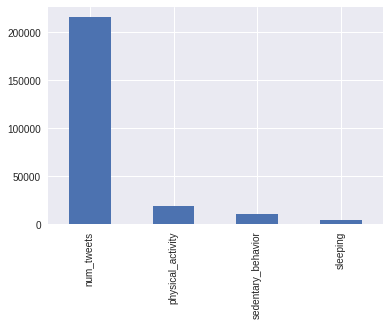

In [8]:
print(regions_df.loc[:, 'num_tweets':].sum())
regions_df.loc[:, 'num_tweets':].sum().plot(kind='bar')

In [14]:
regions_df.head()

,latitude,longitude,num_tweets,physical_activity,sedentary_behavior,sleeping
placename,,,,,,
#FNLROM at Royal Ontario Museum,NaN,NaN,1.0,0.0,0.0,0.0
#Sadness,NaN,NaN,1.0,0.0,0.0,1.0
10 Dundas East,NaN,NaN,1.0,0.0,0.0,0.0
100 Bay Street South,NaN,NaN,1.0,0.0,0.0,0.0
1010 Bistro,NaN,NaN,1.0,0.0,0.0,0.0


In [ ]:
compute_geolocation_regions_geocoder(regions_df)